In [2]:
%pylab inline
from pygadgetreader import *
from octopus import density, orbit_cm

Populating the interactive namespace from numpy and matplotlib


# Objective:

Study the effect of the LMC on the $\beta$ of the MW

1. What is the $\beta$ of the isolated MW?
2. Study this as a function of $r, t, \theta, \phi$


# Questions:

1. Why the initial MW set up starts with $\beta=0.75$?

## References:

1. N.W Evans 16, The alignment of the second velocity moment tensor in galaxies
2. Rashkov 13, A “LIGHT,” CENTRALLY CONCENTRATED MILKY WAY HALO?
3. Watkins 10, The masses of the Milky Way and Andromeda galaxies
4. Bhattacharjee, 14. ROTATION CURVE OF THE MILKY WAY OUT TO ∼200 kpc https://ui.adsabs.harvard.edu/#abs/2014ApJ...785...63B/abstract

In [3]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

## Computing the anisotropy parameter $\beta$ defined as:

\begin{equation}
\beta = 1 - \dfrac{\sigma_t^2}{2\sigma_r^2}
\end{equation}

How to compute $\sigma_t$ and $\sigma_r$

\begin{equation}
V_r = \dfrac{\vec{v}\cdot \vec{r}}{|\vec{r}|}
\end{equation}


\begin{equation}
V_t = \dfrac{\vec{v} \times \vec{r}}{|\vec{r}|}
\end{equation}

\begin{equation}
\sigma_k = \sqrt{\dfrac{\sum_i (V_{k,i} - \bar{V_k})^2}{N}}
\end{equation}

Where $k$ could be either $r,t$

In [24]:
# Core functions
def radial_velocity(xyz, vxyz):
    v_r = [np.dot(xyz[i], vxyz[i]) / np.linalg.norm(xyz[i]) for i in range(len(xyz))]
    vr_disp = np.std(v_r)
    return v_r, vr_disp
    
def tangential_velocity(xyz, vxyz):
    v_t = [np.linalg.norm(np.cross(xyz[i], vxyz[i]))/ np.linalg.norm(xyz[i]) for i in range(len(xyz))]
    vt_disp = np.std(v_t)
    return v_t, vt_disp
    
def beta(xyz, vxyz):
    vt, sigma_t = tangential_velocity(xyz, vxyz)
    vr, sigma_r = radial_velocity(xyz, vxyz)
    Beta = 1 - sigma_t**2.0/(2.0*sigma_r**2.0)
    return Beta

In [25]:
vmw, vrdis = radial_velocity(MW_pos, MW_vel)

In [32]:
np.stack?

## MW data

In [26]:
times_mw = np.array([0, 10, 20, 30, 40])
B_MW = np.zeros(len(times_mw))
j = 0
for i in times_mw:
    print 'time {:0>3d}'.format(i)
    MW_pos = readsnap(('../data/MW_models/pm/model2/MWN2vir_{:0>3d}.hdf5').format(i), 'pos', 'dm')  
    MW_vel = readsnap(('../data/MW_models/pm/model2/MWN2vir_{:0>3d}.hdf5').format(i), 'vel', 'dm')
    rMW = np.sqrt((MW_pos[:,0]**2.0 + MW_pos[:,1]**2.0 + MW_pos[:,2]**2.0))
    r_cut = np.where(rMW < 400)[0]
    MW_pos = MW_pos[r_cut]
    MW_vel = MW_vel[r_cut]
    B_MW[j] = beta(MW_pos, MW_vel)
    j+=1


time 000
Returning DM    Positions
Returning DM    Velocities
time 010
Returning DM    Positions
Returning DM    Velocities
time 020
Returning DM    Positions
Returning DM    Velocities
time 030
Returning DM    Positions
Returning DM    Velocities
time 040
Returning DM    Positions
Returning DM    Velocities


(-0.5, 4.5)

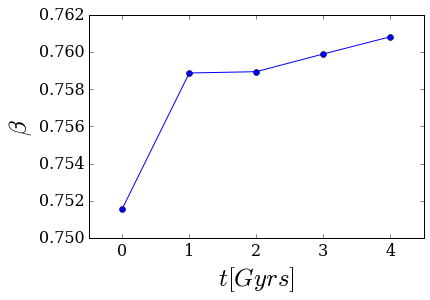

In [27]:
plot(times_mw/10., B_MW, 'o', ls='-')
xlabel('$t[Gyrs]$', fontsize=25)
ylabel(r'$\beta$', fontsize=25)
#ylim([0.73, 0.742])
xlim([-0.5, 4.5])

### Let's choose the MW snapshot at t=2Gyr ans stdudy the dependence with $r$

In [28]:
r_bins = np.array([0,5,10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350])
B_MW_t0 = np.zeros((len(r_bins)-1))
j=0
for i in range(1,len(r_bins)):
    MW_pos_t0 = readsnap('../data/MW_models/pm/model2/MWN2vir_000.hdf5', 'pos', 'dm')  
    MW_vel_t0 = readsnap('../data/MW_models/pm/model2/MWN2vir_000.hdf5', 'vel', 'dm')
    r = np.sqrt(MW_pos_t0[:,0]**2.0 + MW_pos_t0[:,1]**2.0 + MW_pos_t0[:,2]**2.0)
    r_cut = np.where((r<r_bins[i]) & (r>r_bins[i-1]))[0]
    MW_pos = MW_pos_t0[r_cut]
    MW_vel = MW_vel_t0[r_cut]
    B_MW_t0[j] = beta(MW_pos, MW_vel)
    j+=1

Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities


In [34]:
r_bins = np.array([0,5,10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350])
B_MW_t2 = np.zeros((len(r_bins)-1))
j=0
for i in range(1,len(r_bins)):
    MW_pos_t2 = readsnap('../data/MW_models/pm/model2/MWN2vir_024.hdf5', 'pos', 'dm')  
    MW_vel_t2 = readsnap('../data/MW_models/pm/model2/MWN2vir_024.hdf5', 'vel', 'dm')
    r = np.sqrt(MW_pos_t2[:,0]**2.0 + MW_pos_t2[:,1]**2.0 + MW_pos_t2[:,2]**2.0)
    r_cut = np.where((r<r_bins[i]) & (r>r_bins[i-1]))[0]
    MW_pos = MW_pos_t2[r_cut]
    MW_vel = MW_vel_t2[r_cut]
    B_MW_t2[j] = beta(MW_pos, MW_vel)
    j+=1

Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities


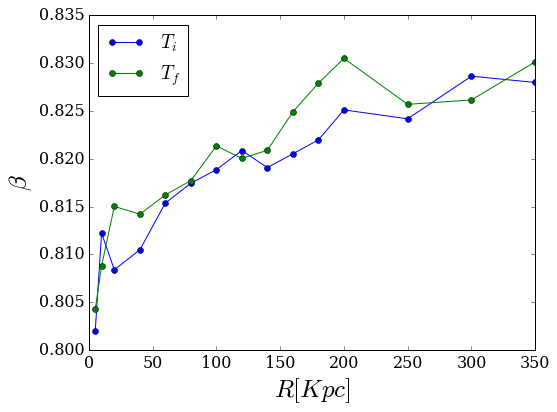

In [37]:
figure(figsize=(8,6))
plot(r_bins[1:], B_MW_t0, 'o', ls='-', label='$T_i$')
plot(r_bins[1:], B_MW_t2, 'o', ls='-', label='$T_f$')
legend(loc='best')
xlabel('$R[Kpc]$', fontsize=25)
ylabel(r'$\beta$', fontsize=25)

### With the LMC

In [38]:
all_pos_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
all_vel_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
all_pid_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')

all_pos_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
all_vel_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
all_pid_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [39]:
def mw_particles(xyz, vxyz, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    index_lmc = np.where(ids>=id_cut)[0]
    return xyz[index_mw], vxyz[index_mw], xyz[index_lmc], vxyz[index_lmc]

In [40]:
mw_pos_i, mw_vel_i, lmc_pos_i, lmc_vel_i = mw_particles(all_pos_i, all_vel_i, all_pid_i, 1000000) 
mw_pos_f, mw_vel_f, lmc_pos_f, lmc_vel_f = mw_particles(all_pos_f, all_vel_f, all_pid_f, 1000000) 

In [41]:
xmw_cm, ymw_cm, zmw_cm, vxmw_cm, vymw_cm, vzmw_cm = orbit_cm.CM(mw_pos_f, mw_vel_f)

rall_cm = np.array([xmw_cm, ymw_cm, zmw_cm]) 
vall_cm = np.array([vxmw_cm, vymw_cm, vzmw_cm]) 

mw_clean_i = np.where(np.sqrt(mw_pos_i[:,0]**2.0 + mw_pos_i[:,1]**2.0 + mw_pos_i[:,2]**2.0)<400)[0]
mw_clean_f = np.where(np.sqrt((mw_pos_f[:,0]-xmw_cm)**2.0 + (mw_pos_f[:,1]-ymw_cm)**2.0 + (mw_pos_f[:,2]-zmw_cm)**2.0)<400)[0]
all_clean_f = np.where(np.sqrt((all_pos_f[:,0]-xmw_cm)**2.0 + (all_pos_f[:,1]-ymw_cm)**2.0 + (all_pos_f[:,2]-zmw_cm)**2.0)<400)[0]

mw_pos_i = mw_pos_i[mw_clean_i]
mw_vel_i = mw_vel_i[mw_clean_i]
mw_pos_f = mw_pos_f[mw_clean_f]- rall_cm # corrected to the CM positions
mw_vel_f = mw_vel_f[mw_clean_f]- vall_cm# corrected to the CM positions
all_pos_f = all_pos_f[all_clean_f]- rall_cm# corrected to the CM positions
all_vel_f = all_vel_f[all_clean_f]- vall_cm# corrected to the CM positions

In [42]:
b_mwi = beta(mw_pos_i, mw_vel_i)

In [43]:
b_mwf = beta(mw_pos_f, mw_vel_f)

In [44]:
b_mwlmcf = beta(all_pos_f, all_vel_f)

In [45]:
print b_mwi, b_mwf, b_mwlmcf

0.751579441252 0.759875539724 0.657554826252


In [46]:
r_bins = np.array([0,5,10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350])
B_MW2 = np.zeros((len(r_bins)-1))
B_all2 = np.zeros((len(r_bins)-1))
j=0
for i in range(1,len(r_bins)):
    r = np.sqrt(mw_pos_f[:,0]**2.0 + mw_pos_f[:,1]**2.0 + mw_pos_f[:,2]**2.0)
    r_all = np.sqrt(all_pos_f[:,0]**2.0 + all_pos_f[:,1]**2.0 + all_pos_f[:,2]**2.0)
    r_cut = np.where((r<r_bins[i]) & (r>r_bins[i-1]))[0]
    r_cut_all = np.where((r_all<r_bins[i]) & (r_all>r_bins[i-1]))[0]
    MW_pos = mw_pos_f[r_cut]
    MW_vel = mw_vel_f[r_cut]
    All_pos = all_pos_f[r_cut_all]
    All_vel = all_vel_f[r_cut_all]
    B_MW2[j] = beta(MW_pos, MW_vel)
    B_all2[j] = beta(All_pos, All_vel)
    j+=1

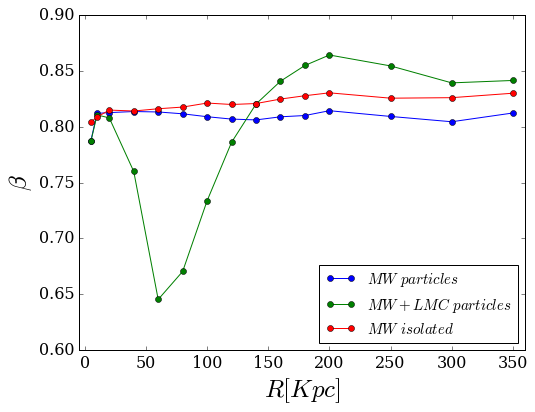

In [48]:
figure(figsize=(8,6))
plot(r_bins[1:], B_MW2, 'o', ls='-', label='$MW\ particles$')
plot(r_bins[1:], B_all2, 'o', ls='-', label='$MW+LMC\ particles$')
plot(r_bins[1:], B_MW_t2, 'o', ls='-', label='$MW\ isolated$')
xlim([-5, 360])
#ylim([0.7, 0.85])
legend(loc='best', fontsize=15)
xlabel('$R[Kpc]$', fontsize=25)
ylabel(r'$\beta$', fontsize=25)

## Angular dependence

In [49]:
# Binney and Tramaine parametrization
def b_r(r_a, r):
    B = 1./(1. + r_a**2/r**2)
    return B

In [50]:
b_teo_r = b_r(20.0, r_bins[1:])

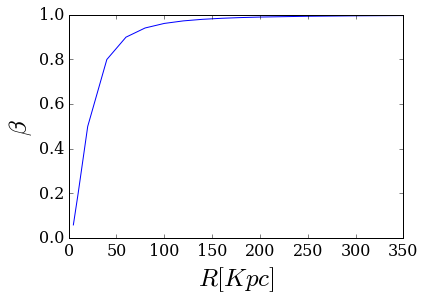

In [51]:
plot(r_bins[1:], b_teo_r)
xlabel('$R[Kpc]$', fontsize=25)
ylabel(r'$\beta$', fontsize=25)

In [52]:
def angle_cuts(xyz, vxyz, cuadrant):
    r_bins = np.array([0, 5,10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350])
    B_angle = np.zeros((len(r_bins)-1))
    j=0
    if cuadrant == 1:
        angle_cut = np.where((xyz[:,0]>0) & (xyz[:,1]>0) & (xyz[:,2]>0))[0]
    elif cuadrant ==2:
        angle_cut = np.where((xyz[:,0]<0) & (xyz[:,1]>0) & (xyz[:,2]>0))[0]
    elif cuadrant ==3:
        angle_cut = np.where((xyz[:,0]>0) & (xyz[:,1]<0) & (xyz[:,2]>0))[0]
    elif cuadrant ==4:
        angle_cut = np.where((xyz[:,0]<0) & (xyz[:,1]<0) & (xyz[:,2]>0))[0]
    elif cuadrant ==5:
        angle_cut = np.where((xyz[:,0]>0) & (xyz[:,1]>0) & (xyz[:,2]<0))[0]
    elif cuadrant ==6:
        angle_cut = np.where((xyz[:,0]<0) & (xyz[:,1]>0) & (xyz[:,2]<0))[0]
    elif cuadrant ==7:
        angle_cut = np.where((xyz[:,0]>0) & (xyz[:,1]<0) & (xyz[:,2]<0))[0]
    elif cuadrant ==8:
        angle_cut = np.where((xyz[:,0]<0) & (xyz[:,1]<0) & (xyz[:,2]<0))[0]
    
    xyz1 = xyz[angle_cut]
    vxyz1 = vxyz[angle_cut]

    for i in range(1,len(r_bins)):
        r = np.sqrt(xyz1[:,0]**2.0 + xyz1[:,1]**2.0 + xyz1[:,2]**2.0)
        r_cut = np.where((r<r_bins[i]) & (r>r_bins[i-1]))[0]
        xyz_pos = xyz1[r_cut]
        xyz_vel = vxyz1[r_cut]
        B_angle[j] = beta(xyz_pos, xyz_vel)
        j+=1
    return B_angle

In [53]:
B_angle1 = angle_cuts(mw_pos_f, mw_vel_f, 1)
B_angle2 = angle_cuts(mw_pos_f, mw_vel_f, 2)
B_angle3 = angle_cuts(mw_pos_f, mw_vel_f, 3)
B_angle4 = angle_cuts(mw_pos_f, mw_vel_f, 4)
B_angle5 = angle_cuts(mw_pos_f, mw_vel_f, 5)
B_angle6 = angle_cuts(mw_pos_f, mw_vel_f, 6)
B_angle7 = angle_cuts(mw_pos_f, mw_vel_f, 7)
B_angle8 = angle_cuts(mw_pos_f, mw_vel_f, 8)

In [54]:
Blmc_angle1 = angle_cuts(all_pos_f, all_vel_f, 1)
Blmc_angle2 = angle_cuts(all_pos_f, all_vel_f, 2)
Blmc_angle3 = angle_cuts(all_pos_f, all_vel_f, 3)
Blmc_angle4 = angle_cuts(all_pos_f, all_vel_f, 4)
Blmc_angle5 = angle_cuts(all_pos_f, all_vel_f, 5)
Blmc_angle6 = angle_cuts(all_pos_f, all_vel_f, 6)
Blmc_angle7 = angle_cuts(all_pos_f, all_vel_f, 7)
Blmc_angle8 = angle_cuts(all_pos_f, all_vel_f, 8)

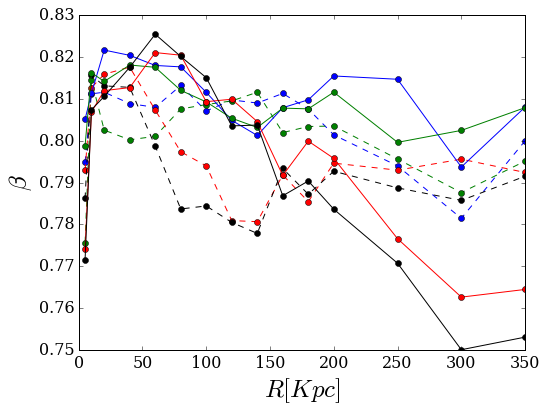

In [58]:
figure(figsize=(8,6))
plot(r_bins[1:], B_angle1, 'o',ls='--', c='b')
plot(r_bins[1:], B_angle2, 'o',ls='--', c='g')
plot(r_bins[1:], B_angle3, 'o',ls='--', c='r')
plot(r_bins[1:], B_angle4, 'o',ls='--', c='k')
plot(r_bins[1:], B_angle5, 'o',ls='-', c='b')
plot(r_bins[1:], B_angle6, 'o',ls='-', c='g')
plot(r_bins[1:], B_angle7, 'o',ls='-', c='r')
plot(r_bins[1:], B_angle8, 'o',ls='-', c='k')
xlabel('$R[Kpc]$', fontsize=25)
ylabel(r'$\beta$', fontsize=25)

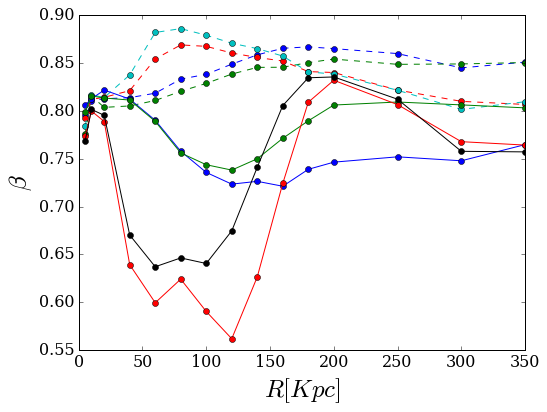

In [61]:
figure(figsize=(8,6))

plot(r_bins[1:], Blmc_angle1, 'o',ls='--')
plot(r_bins[1:], Blmc_angle2, 'o', ls='--')
plot(r_bins[1:], Blmc_angle3, 'o', ls='--')
plot(r_bins[1:], Blmc_angle4, 'o', ls='--')
plot(r_bins[1:], Blmc_angle5, 'o', ls='-', c='b')
plot(r_bins[1:], Blmc_angle6, 'o', ls='-', c='g')
plot(r_bins[1:], Blmc_angle7, 'o', ls='-', c='r')
plot(r_bins[1:], Blmc_angle8, 'o', ls='-', c='k')
xlabel('$R[Kpc]$', fontsize=25)
ylabel(r'$\beta$', fontsize=25)